<a href="https://colab.research.google.com/github/meenahn79/ANN/blob/master/MNIST_digit_recog_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----------------------------------------------------------------
size of train (60000, 28, 28)


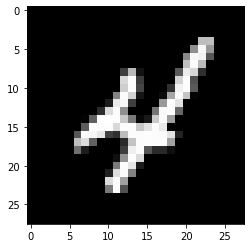

class label of the  image 4
number of training example = 60000 shape of each image= 784
number of testing example = 10000 shape of each image= 784
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.  

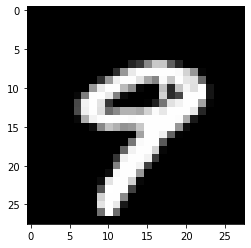

In [26]:
import tensorflow as tf # Import tensorflow library
import matplotlib.pyplot as plt # Import matplotlib library
import numpy as np # Import numpy library
from keras.utils import np_utils
import keras.models
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras.optimizers import SGD,Adam
from keras.utils import to_categorical
import seaborn as sns

mnist = tf.keras.datasets.mnist

 # Object of the MNIST dataset 
(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data
(x_train1, y_train1),(x_test1, y_test1) = mnist.load_data() 
test=y_test.copy()
print("----------------------------------------------------------------")
print("size of train", np.shape(x_train))

plt.imshow(x_train[9], cmap="gray") # Import the image
plt.show() # Plot the image
print("class label of the  image",y_train[9])

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]) # Normalize the training dataset
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]) # Normalize the testing dataset

x_train=x_train/255
x_test= x_test/255

print("number of training example =",x_train.shape[0],"shape of each image=",x_train.shape[1])
print("number of testing example =",x_test.shape[0],"shape of each image=",x_test.shape[1])
print(x_train[0])


y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
print("After converting the output to vector", y_train[0])

model = Sequential()
model.add(Dense(10,input_shape=(784,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(10,activation='softmax'))
model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(x_train,y_train,epochs=5)

# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)

# Print out the model accuracy 
print('\nTest accuracy:', test_acc)
predictions = model.predict_classes([x_test]) # Make prediction

print((predictions[9])) # Print out the number
plt.imshow(x_test1[9], cmap="gray") # Import the ima
plt.show()